The pandas_datareader library is a Python package that allows you to easily retrieve data from various online sources directly into a pandas DataFrame.

In [5]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf


Getting the stock symbols in the portfolio

In [6]:
start = "2014-01-01"
end = "2024-02-14"

# Download the data for each stock
TCS = yf.download('TCS', start=start, end=end)['Adj Close']
infy = yf.download('INFY', start=start, end=end)['Adj Close']
wipro = yf.download('WIPRO.NS', start=start, end=end)['Adj Close']

# Create a DataFrame with 'Adj Close' columns for each stock
assets = pd.concat([TCS, infy, wipro], axis=1)
assets.columns = ['TCS', 'INFY', 'WIPRO']

# Display the DataFrame
print(assets)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                  TCS       INFY       WIPRO
Date                                        
2014-01-01        NaN        NaN  191.799225
2014-01-02  40.924782   5.385751  191.885971
2014-01-03  39.877827   5.542872  193.152603
2014-01-06  40.176956   5.461402  193.638474
2014-01-07  42.803696   5.440064  190.931717
...               ...        ...         ...
2024-02-07   1.030000  20.430000  495.200012
2024-02-08   1.340000  20.190001  488.850006
2024-02-09   1.340000  20.100000  490.450012
2024-02-12   1.300000  20.139999  501.450012
2024-02-13   1.210000  19.860001  511.600006

[2622 rows x 3 columns]


In [7]:
# Drop rows with NaN values
assets_cleaned= assets.dropna()

# Display the cleaned DataFrame
print(assets_cleaned)

                  TCS       INFY       WIPRO
Date                                        
2014-01-02  40.924782   5.385751  191.885971
2014-01-03  39.877827   5.542872  193.152603
2014-01-06  40.176956   5.461402  193.638474
2014-01-07  42.803696   5.440064  190.931717
2014-01-08  36.465870   5.408059  189.873306
...               ...        ...         ...
2024-02-07   1.030000  20.430000  495.200012
2024-02-08   1.340000  20.190001  488.850006
2024-02-09   1.340000  20.100000  490.450012
2024-02-12   1.300000  20.139999  501.450012
2024-02-13   1.210000  19.860001  511.600006

[2419 rows x 3 columns]


Assigning weights to stock . It would sum up to 1
It seems you've defined an array of weights for your assets. Each weight represents the proportion of your portfolio allocated to the corresponding asset. In this case, you've assigned an equal weight of 20% to each of the five assets.


In [8]:
weights=np.array([0.2,0.2,0.2])

In [9]:
df=assets_cleaned

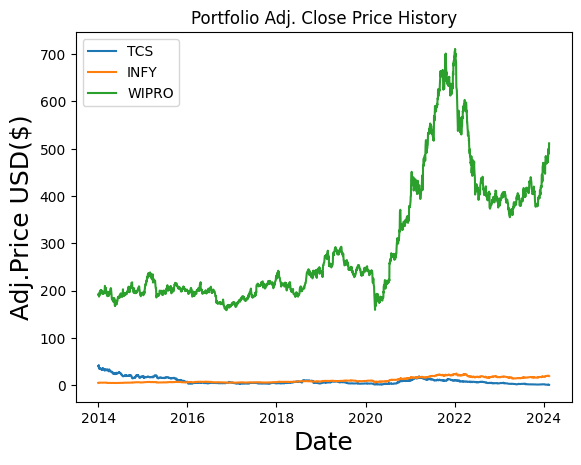

In [17]:
title='Portfolio Adj. Close Price History'
my_stocks=df


for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label=c)

plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj.Price USD($)',fontsize=18)
plt.legend(my_stocks.columns.values,loc='upper left')
plt.show()

In [18]:
returns=df.pct_change()
returns

,TCS,INFY,WIPRO
Date,,,
2014-01-02,NaN,NaN,NaN
2014-01-03,-0.025582,0.029173,0.006601
2014-01-06,0.007501,-0.014698,0.002515
2014-01-07,0.065379,-0.003907,-0.013978
2014-01-08,-0.148067,-0.005883,-0.005543
...,...,...,...
2024-02-07,-0.394118,-0.008734,-0.008906
2024-02-08,0.300971,-0.011747,-0.012823
2024-02-09,0.000000,-0.004458,0.003273


In [19]:
#create and show the annualized covariance matrix
cov_matrix_annual=returns.cov()*252

In [20]:
cov_matrix_annual

,TCS,INFY,WIPRO
TCS,0.549067,0.037233,0.011870
INFY,0.037233,0.079348,0.024444
WIPRO,0.011870,0.024444,0.065494


In [21]:
port_variance = np.dot(weights.T,np.dot(cov_matrix_annual,weights))

In [22]:
port_variance

0.03364017642950261

In [24]:
#calculate the portfolio volatility
port_volatility=np.sqrt(port_variance)
port_volatility

0.18341258525385495

In [25]:
#calculate the annual portfolio return
portfolioSimpleAnnualReturn= np.sum(returns.mean()*weights)*252
portfolioSimpleAnnualReturn

0.04526050586647016

In [31]:
#show the expeted annual return , volatility(risk), variance
percent_var=str(round(port_variance,2)*100)+'%'
percent_vols=str(round(port_volatility,2)*100)+'%'
percent_ret=str(round(portfolioSimpleAnnualReturn,2)*100)+'%'
print('Expected Annual Return:'+percent_ret)
print('Annual volatility/risk:'+percent_vols)
print('Annual variance:'+percent_var)

Expected Annual Return:5.0%
Annual volatility/risk:18.0%
Annual variance:3.0%


In [34]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [38]:
#expected returns & the annualised sample covariance matrix of asset returns
mu=expected_returns.mean_historical_return(df)
S=risk_models.sample_cov(df)

#optimize for maximum sharp ratio
ef=EfficientFrontier(mu,S)
weights = ef.max_sharpe()
cleaned_weights =ef.clean_weights()

In [39]:
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('TCS', 0.0), ('INFY', 0.61088), ('WIPRO', 0.38912)])
Expected annual return: 13.1%
Annual volatility: 22.6%
Sharpe Ratio: 0.49


(0.1308657226682413, 0.2261599356887009, 0.4902093835967616)

In [43]:
#Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices=get_latest_prices(df)
weights=cleaned_weights
da=DiscreteAllocation(weights,latest_prices,total_portfolio_value=15000)
allocation,leftover=da.lp_portfolio()
print('Discrete allocation:',allocation)
print('Funds remaining: ${:.2f}'.format(leftover))


Discrete allocation: {'TCS': 90, 'INFY': 464, 'WIPRO': 11}
Funds remaining: $48.46
